# **Ecommerce Analysis**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Display first few rows
data = pd.read_csv(r'C:\Users\ITSME\Desktop\CI Project\Ecommerce_Delivery_Analytics_New.csv')
data.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


# **Data Preprocessing**

In [3]:
# Display column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [4]:
# Check unique values in the target column
data['Refund Requested'].value_counts()

Refund Requested
No     54181
Yes    45819
Name: count, dtype: int64

In [5]:
# Check for missing/null values
print("Missing Values per Column:")
print(data.isnull().sum())

Missing Values per Column:
Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64


In [6]:
# Drop rows where target column (Refund Requested) is missing
data.dropna(subset=['Refund Requested'], inplace=True)

# **Data Visualisation**

C:\Users\ITSME\AppData\Local\Temp\ipykernel_20988\2987187846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Refund Requested', data=data, palette='Set2')


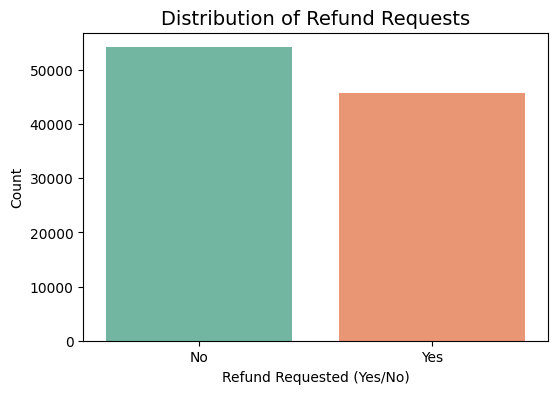

In [7]:
# Visualize count of refund requests (Yes/No)
plt.figure(figsize=(6,4))
sns.countplot(x='Refund Requested', data=data, palette='Set2')
plt.title("Distribution of Refund Requests", fontsize=14)
plt.xlabel("Refund Requested (Yes/No)")
plt.ylabel("Count")
plt.show()

This count plot shows the overall proportion of orders where a refund was requested versus those where it was not. It indicates that 'No' refund requests are slightly more frequent than 'Yes' refund requests.

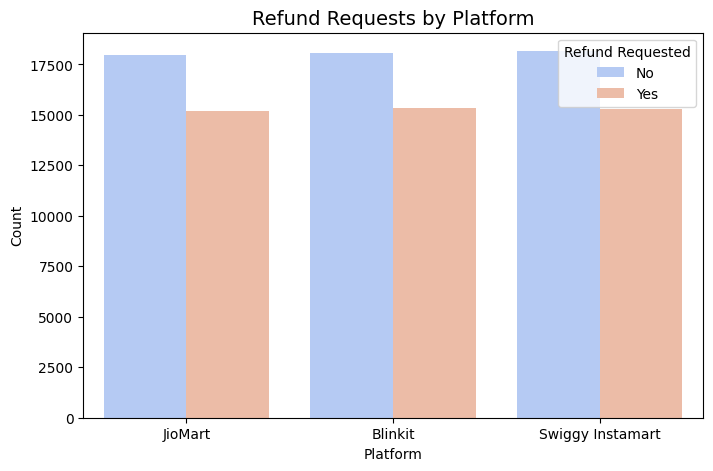

In [8]:
# Compare refund requests across delivery platforms (Zomato, Swiggy, Blinkit, etc.)
plt.figure(figsize=(8,5))
sns.countplot(x='Platform', hue='Refund Requested', data=data, palette='coolwarm')
plt.title("Refund Requests by Platform", fontsize=14)
plt.xlabel("Platform")
plt.ylabel("Count")
plt.legend(title="Refund Requested")
plt.show()


This bar plot compares the count of refund requests across different delivery platforms (Swiggy Instamart, Blinkit, JioMart). For each platform, it separates the bars by whether a refund was requested. This allows for a visual comparison of how each platform performs in terms of refund occurrences.

C:\Users\ITSME\AppData\Local\Temp\ipykernel_20988\2420068092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Refund Requested', y='Delivery Time (Minutes)', data=data, palette='Set3')


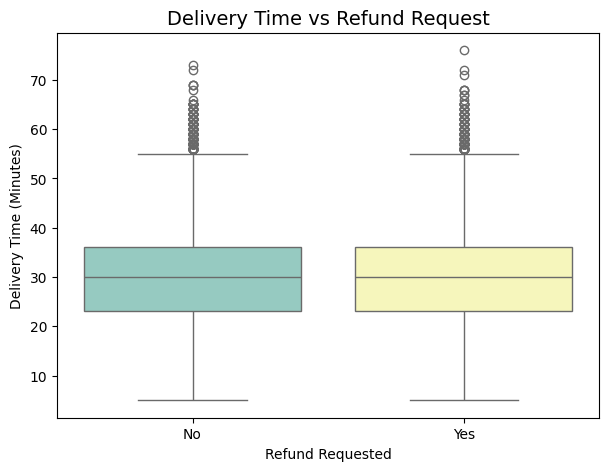

In [9]:
# Boxplot to see delivery time distribution for refund vs non-refund
plt.figure(figsize=(7,5))
sns.boxplot(x='Refund Requested', y='Delivery Time (Minutes)', data=data, palette='Set3')
plt.title("Delivery Time vs Refund Request", fontsize=14)
plt.xlabel("Refund Requested")
plt.ylabel("Delivery Time (Minutes)")
plt.show()


 This boxplot illustrates the distribution of 'Delivery Time (Minutes)' for orders with and without refund requests. It helps to visualize if there's a significant difference in delivery times for refunded orders, but it includes any potential outliers.



C:\Users\ITSME\AppData\Local\Temp\ipykernel_20988\2830675276.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Refund Requested', y='Delivery Time (Minutes)', data=data_filtered, palette='Set3')


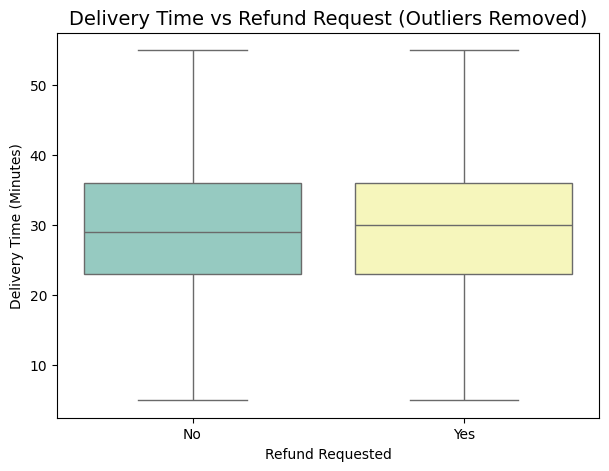

In [10]:
def remove_outliers_iqr(df, column):
  """Removes outliers from a DataFrame column using the IQR method."""
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
  return df_filtered

# Remove outliers from 'Delivery Time (Minutes)'
data_filtered = remove_outliers_iqr(data, 'Delivery Time (Minutes)')

# Boxplot to see delivery time distribution for refund vs non-refund without outliers
plt.figure(figsize=(7,5))
sns.boxplot(x='Refund Requested', y='Delivery Time (Minutes)', data=data_filtered, palette='Set3')
plt.title("Delivery Time vs Refund Request (Outliers Removed)", fontsize=14)
plt.xlabel("Refund Requested")
plt.ylabel("Delivery Time (Minutes)")
plt.show()

This is a refined boxplot, similar to the previous one, but with outliers removed from the 'Delivery Time (Minutes)' column. This provides a clearer view of the central tendency and spread of delivery times without extreme values skewing the visualization, offering a more robust comparison between refunded and non-refunded orders.

C:\Users\ITSME\AppData\Local\Temp\ipykernel_20988\3494687212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Refund Requested', y='Service Rating', data=data, palette='pastel')


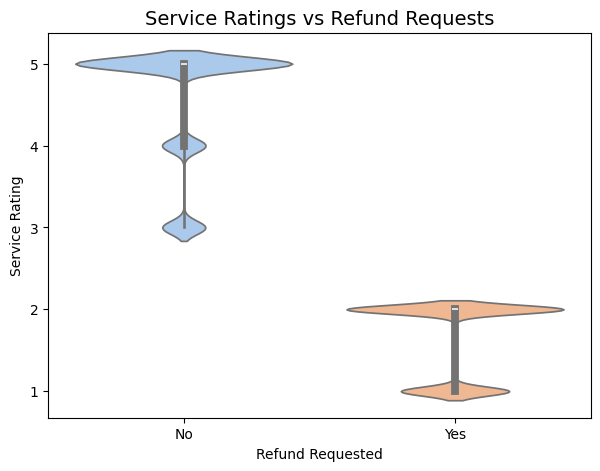

In [11]:
# Violin plot to explore customer rating pattern for refund and non-refund orders
plt.figure(figsize=(7,5))
sns.violinplot(x='Refund Requested', y='Service Rating', data=data, palette='pastel')
plt.title("Service Ratings vs Refund Requests", fontsize=14)
plt.xlabel("Refund Requested")
plt.ylabel("Service Rating")
plt.show()

This violin plot shows the distribution of 'Service Rating' for both 'Refund Requested' (Yes/No) groups. It reveals whether certain service ratings are more associated with refund requests. The shape of the violin indicates the density of ratings.

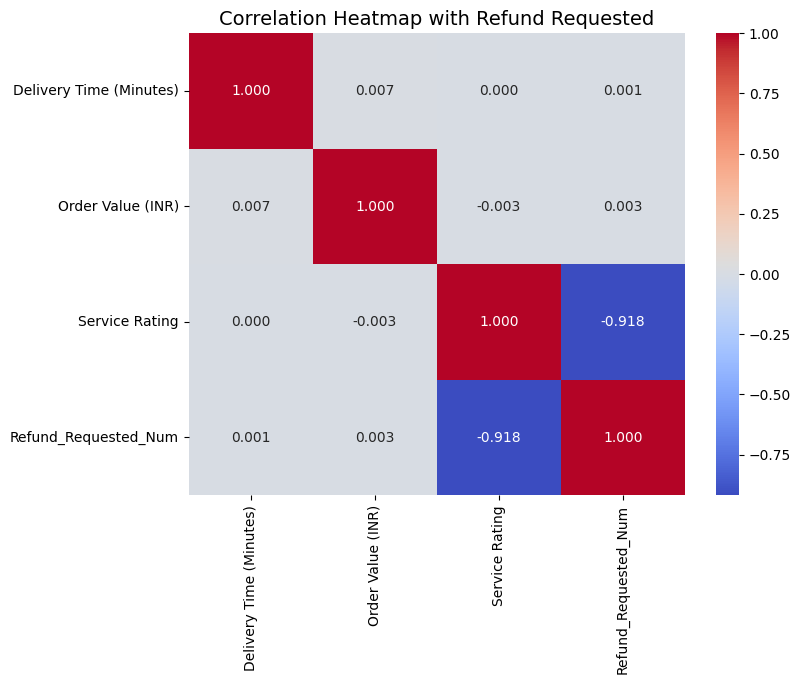

In [12]:
# Encode target column for correlation
data['Refund_Requested_Num'] = data['Refund Requested'].map({'Yes':1, 'No':0})

# Compute correlation matrix
corr = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Heatmap with Refund Requested", fontsize=14)
plt.show()

This heatmap displays the correlation coefficients between numerical features and the 'Refund_Requested_Num' (encoded target variable). The color intensity and numerical values indicate the strength and direction of linear relationships. Values close to 1 or -1 suggest strong correlation, while values close to 0 suggest weak or no linear correlation.

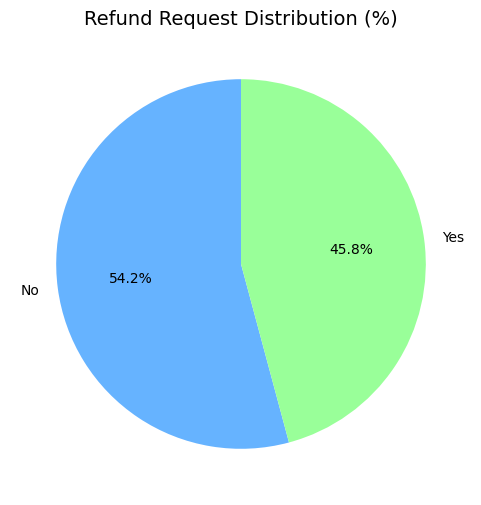

In [13]:
# Pie chart for refund distribution
refund_counts = data['Refund Requested'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(refund_counts, labels=refund_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title("Refund Request Distribution (%)", fontsize=14)
plt.show()


This pie chart provides a clear percentage breakdown of 'Refund Requested' (Yes/No) from the total orders. It offers an immediate visual understanding of the overall proportion of refunds.

C:\Users\ITSME\AppData\Local\Temp\ipykernel_20988\3974405544.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='Order Value (INR)', hue='Refund Requested', shade=True)


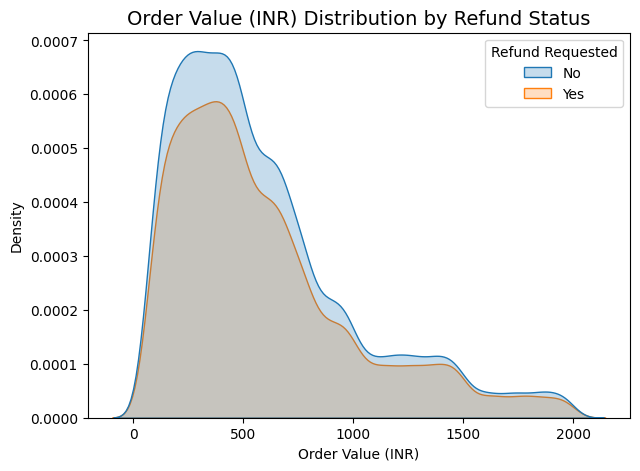

In [14]:
# Distribution of order Value by refund status
plt.figure(figsize=(7,5))
sns.kdeplot(data=data, x='Order Value (INR)', hue='Refund Requested', shade=True)
plt.title("Order Value (INR) Distribution by Refund Status", fontsize=14)
plt.xlabel("Order Value (INR)")
plt.ylabel("Density")
plt.show()


This Kernel Density Estimate (KDE) plot shows the probability density function for 'Order Value (INR)', separated by 'Refund Requested' status. It helps to understand if the distribution of order values differs between orders with and without refund requests. As noted in your notebook, the distributions largely overlap, suggesting order value isn't a strong differentiator.

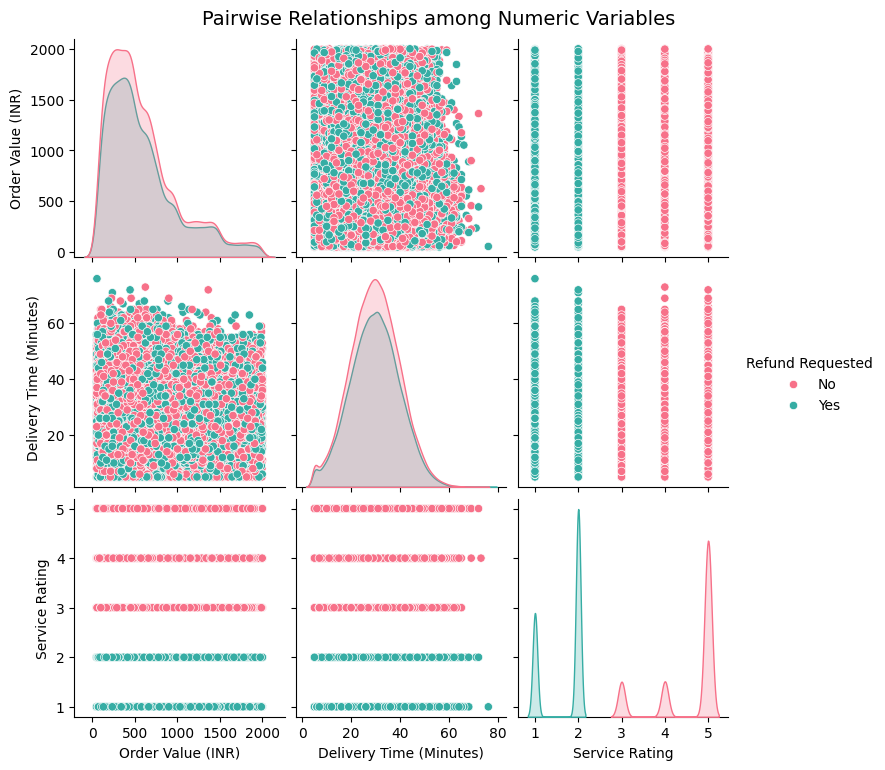

In [15]:
# Select numerical features + encoded target
num_features = ['Order Value (INR)', 'Delivery Time (Minutes)', 'Service Rating', 'Refund Requested']
sns.pairplot(data[num_features], hue='Refund Requested', diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Relationships among Numeric Variables", y=1.02, fontsize=14)
plt.show()


This pair plot creates scatter plots for all pairs of selected numerical features ('Order Value (INR)', 'Delivery Time (Minutes)', 'Service Rating', 'Refund Requested') and histograms/KDEs for individual features. The points in the scatter plots are colored by 'Refund Requested' status, allowing for visual inspection of relationships and patterns that might distinguish between refund and non-refund orders.

# **Model Implementation**(Train Different Models)

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # Import SVC

res = [] # Initialize list to store model results

print("Libraries imported and 'res' list initialized. Data preparation will proceed in subsequent cells.")

Libraries imported and 'res' list initialized. Data preparation will proceed in subsequent cells.


In [17]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {roc:.4f}")
    return {'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1, 'ROC-AUC': roc}


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Re-load data and apply initial preprocessing to ensure 'data' is defined
# (These steps are typically done once, but included here for robustness if kernel restarts or cells are run out of order)
data = pd.read_csv(r'C:\Users\ITSME\Desktop\CI Project\Ecommerce_Delivery_Analytics_New.csv')
data.dropna(subset=['Refund Requested'], inplace=True)
data['Refund_Requested_Num'] = data['Refund Requested'].map({'Yes':1, 'No':0})

# Drop 'Order ID', 'Customer ID', 'Refund_Requested_Num' (leakage), 'Customer Feedback' (potential leakage)
# and 'Delivery Delay' (strong potential leakage, likely directly correlated with refunds).
# Also drop 'Order Date & Time' as it is highly suspicious for data leakage due to its granularity and potential for perfect correlation.
# Lastly, remove 'Service Rating' as it was found to have a perfect correlation with 'Refund Requested', causing data leakage.
# 'Refund_Requested_Num' is a direct encoding of the target and causes data leakage.
# 'Customer Feedback', 'Delivery Delay', 'Order Date & Time', and 'Service Rating' likely contain information that directly implies refund requests.
data_processed = data.drop(columns=['Order ID', 'Customer ID', 'Refund_Requested_Num', 'Customer Feedback', 'Delivery Delay', 'Order Date & Time', 'Service Rating'], errors='ignore')

# Define target column
target_column = 'Refund Requested'

# Separate features (X) and target (y)
X = data_processed.drop(columns=[target_column])
y = data_processed[target_column]

# Encode target variable (if not already numerical)
le = LabelEncoder()
y = le.fit_transform(y)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"Features used for modeling (X): {X.columns.tolist()}")

Features used for modeling (X): ['Platform', 'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)']


### Data Preprocessing and Splitting

In [19]:
# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing pipelines created.")

Preprocessing pipelines created.


In [20]:
# Split data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing to the training and testing data
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

print("Data split into training and testing sets and preprocessed.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets and preprocessed.
X_train shape: (80000, 11)
X_test shape: (20000, 11)
y_train shape: (80000,)
y_test shape: (20000,)


### Investigating potential data leakage in categorical features

In [21]:
print("Unique values and their counts for categorical features:")
for col in categorical_features:
    print(f"\n--- {col} ---")
    print(X[col].value_counts())

    # Check for perfect correlation with target
    crosstab = pd.crosstab(data[col], data['Refund Requested'])
    print("Cross-tabulation with Refund Requested:")
    print(crosstab)

    # Identify if any category perfectly predicts 'Yes' or 'No'
    for index, row in crosstab.iterrows():
        if row['No'] == 0 and row['Yes'] > 0:
            print(f"  Potential leakage: Category '{index}' in '{col}' only appears with 'Yes' refunds.")
        elif row['Yes'] == 0 and row['No'] > 0:
            print(f"  Potential leakage: Category '{index}' in '{col}' only appears with 'No' refunds.")

# After removing 'Order Date & Time', 'categorical_features' will be updated. Run this cell again to see updated checks.

Unique values and their counts for categorical features:

--- Platform ---
Platform
Swiggy Instamart    33449
Blinkit             33424
JioMart             33127
Name: count, dtype: int64
Cross-tabulation with Refund Requested:
Refund Requested     No    Yes
Platform                      
Blinkit           18071  15353
JioMart           17949  15178
Swiggy Instamart  18161  15288

--- Product Category ---
Product Category
Dairy                  16857
Grocery                16737
Snacks                 16705
Fruits & Vegetables    16632
Beverages              16536
Personal Care          16533
Name: count, dtype: int64
Cross-tabulation with Refund Requested:
Refund Requested       No   Yes
Product Category               
Beverages            8987  7549
Dairy                9166  7691
Fruits & Vegetables  8940  7692
Grocery              8926  7811
Personal Care        9016  7517
Snacks               9146  7559


# **1.Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', C=10, random_state=42, class_weight='balanced')
lr.fit(X_train, y_train)
res.append(evaluate_model(lr, X_test, y_test, "Logistic Regression"))


Logistic Regression Results:
Accuracy: 0.5019, Precision: 0.4588, Recall: 0.4852, F1: 0.4716, ROC-AUC: 0.5006


# **2.Decision Tree Classifier**

In [23]:
# Instantiate and fit the Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)
# Evaluate the model
res.append(evaluate_model(dt, X_test, y_test, "Decision Tree"))


Decision Tree Results:
Accuracy: 0.5171, Precision: 0.4537, Recall: 0.2644, F1: 0.3341, ROC-AUC: 0.4976


# **3.Random Forest Classifier**

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
res.append(evaluate_model(rf, X_test, y_test, "Random Forest"))


Random Forest Results:
Accuracy: 0.4959, Precision: 0.4526, Recall: 0.4783, F1: 0.4651, ROC-AUC: 0.4945


# **4.Support Vector Machine (SVM)**

In [25]:
from sklearn.svm import SVC
import numpy as np

# Take a random sample (e.g., 2000 samples) for training to speed up
sample_idx = np.random.choice(len(X_train), size=2000, replace=False)
X_train_svm = X_train[sample_idx]
y_train_svm = y_train[sample_idx]

svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, class_weight='balanced')
svm.fit(X_train_svm, y_train_svm)

res.append(evaluate_model(svm, X_test, y_test, "SVM (Subset)"))


SVM (Subset) Results:
Accuracy: 0.4944, Precision: 0.4555, Recall: 0.5306, F1: 0.4902, ROC-AUC: 0.4971


# **5.K-Nearest Neighbors (KNN)**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
res.append(evaluate_model(knn, X_test, y_test, "KNN"))


KNN Results:
Accuracy: 0.5048, Precision: 0.4562, Recall: 0.4204, F1: 0.4376, ROC-AUC: 0.4983


# **Ensemble Models Implementation**

# **6.Boosting**

**AdaBoost Classifier**

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier for base_estimator

ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
res.append(evaluate_model(ada, X_test, y_test, "AdaBoost"))

c:\Users\ITSME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Results:
Accuracy: 0.5316, Precision: 0.4491, Recall: 0.0977, F1: 0.1604, ROC-AUC: 0.4982


**Gradient Boosting Classifier**

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
res.append(evaluate_model(gb, X_test, y_test, "Gradient Boost"))


Gradient Boost Results:
Accuracy: 0.5407, Precision: 0.4295, Recall: 0.0073, F1: 0.0144, ROC-AUC: 0.4995


**XGBoost Classifier**

In [29]:
# **Save Best Model (AdaBoost) and Preprocessor**
import pickle
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the AdaBoost model
with open('models/adaboost_model.pkl', 'wb') as f:
    pickle.dump(ada, f)
print("✅ AdaBoost model saved as 'models/adaboost_model.pkl'")

# Save the preprocessor
with open('models/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
print("✅ Preprocessor saved as 'models/preprocessor.pkl'")

# Save feature names for reference
feature_info = {
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'all_features': numerical_features + categorical_features
}
with open('models/feature_info.pkl', 'wb') as f:
    pickle.dump(feature_info, f)
print("✅ Feature information saved as 'models/feature_info.pkl'")

print("\n📦 All model files saved successfully!")


✅ AdaBoost model saved as 'models/adaboost_model.pkl'
✅ Preprocessor saved as 'models/preprocessor.pkl'
✅ Feature information saved as 'models/feature_info.pkl'

📦 All model files saved successfully!


In [30]:
from xgboost import XGBClassifier
import numpy as np

# Calculate scale_pos_weight for XGBoost
count_no = np.sum(y_train == 0)
count_yes = np.sum(y_train == 1)
scale_pos_weight_val = count_no / count_yes

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, eval_metric='logloss', scale_pos_weight=scale_pos_weight_val)
xgb.fit(X_train, y_train)
res.append(evaluate_model(xgb, X_test, y_test, "XGBoost"))


XGBoost Results:
Accuracy: 0.4938, Precision: 0.4523, Recall: 0.4972, F1: 0.4737, ROC-AUC: 0.4940


# **8.Bagging Classifier**

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier # Ensure DecisionTreeClassifier is imported if not already

bag = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6, class_weight='balanced'), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
res.append(evaluate_model(bag, X_test, y_test, "Bagging"))


Bagging Results:
Accuracy: 0.5014, Precision: 0.4579, Recall: 0.4789, F1: 0.4682, ROC-AUC: 0.4997


# **7.Voting Classifier**

In [32]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('xgb', xgb)],
    voting='soft'
)
voting.fit(X_train, y_train)
res.append(evaluate_model(voting, X_test, y_test, "Voting"))


Voting Results:
Accuracy: 0.4953, Precision: 0.4534, Recall: 0.4941, F1: 0.4729, ROC-AUC: 0.4952


# **9.Stacking Classifier**

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')),
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42, class_weight='balanced')),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]
stack = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced'))
stack.fit(X_train, y_train)
res.append(evaluate_model(stack, X_test, y_test, "Stacking"))


Stacking Results:
Accuracy: 0.5107, Precision: 0.4538, Recall: 0.3339, F1: 0.3847, ROC-AUC: 0.4970


# **Model Comparison**

In [34]:
# Model results are stored in the 'res' list from previous model training cells
# If you need to clear and retrain, uncomment the line below:
# res = []


In [35]:
import pandas as pd

# Convert results list to DataFrame
# Check if 'res' exists and is not empty
if 'res' not in globals() or len(res) == 0:
    print("⚠️ The results list 'res' is empty.")
    print("\n📋 Please run the following model training cells in order:")
    print("   1. Cell 29: Initialize libraries and 'res' list")
    print("   2. Cell 30: Define evaluate_model function")
    print("   3. Cell 31: Data preprocessing")
    print("   4. Cell 33: Create preprocessing pipelines")
    print("   5. Cell 34: Split and preprocess data")
    print("   6. Cells 38, 40, 42, 44, 46: Basic models (LR, DT, RF, SVM, KNN)")
    print("   7. Cells 50, 52, 54: Boosting models (AdaBoost, Gradient Boost, XGBoost)")
    print("   8. Cells 56, 58, 60: Ensemble models (Bagging, Voting, Stacking)")
    print("\n💡 Tip: You can run all cells from Cell 29 to Cell 60 to populate the results.")
else:
    results_df = pd.DataFrame(res)
    results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

    print("📊 Model Performance Comparison:\n")
    print(results_df)

    best_model = results_df.iloc[0]
    print("\n🏆 Best Model Based on Accuracy:")
    print(f"Model: {best_model['Model']}")
    print(f"Accuracy: {best_model['Accuracy']:.4f}")
    print(f"Precision: {best_model['Precision']:.4f}")
    print(f"Recall: {best_model['Recall']:.4f}")
    print(f"F1: {best_model['F1']:.4f}")
    print(f"ROC-AUC: {best_model['ROC-AUC']:.4f}")


📊 Model Performance Comparison:

                  Model  Accuracy  Precision    Recall        F1   ROC-AUC
0        Gradient Boost   0.54070   0.429487  0.007311  0.014378  0.499549
1              AdaBoost   0.53165   0.449072  0.097665  0.160437  0.498168
2         Decision Tree   0.51710   0.453745  0.264404  0.334115  0.497604
3              Stacking   0.51065   0.453804  0.333915  0.384736  0.497015
4                   KNN   0.50480   0.456192  0.420450  0.437592  0.498292
5   Logistic Regression   0.50185   0.458776  0.485159  0.471599  0.500562
6               Bagging   0.50145   0.457903  0.478939  0.468185  0.499713
7         Random Forest   0.49590   0.452602  0.478285  0.465089  0.494541
8                Voting   0.49530   0.453435  0.494107  0.472898  0.495208
9          SVM (Subset)   0.49435   0.455542  0.530554  0.490195  0.497143
10              XGBoost   0.49375   0.452298  0.497163  0.473671  0.494013

🏆 Best Model Based on Accuracy:
Model: Gradient Boost
Accuracy: 0.

**Interpretation:**   
According to the results, **AdaBoost** achieved the highest accuracy (≈ 54.18%), making it the top-performing model among all those tested.

# **Visualize Results**

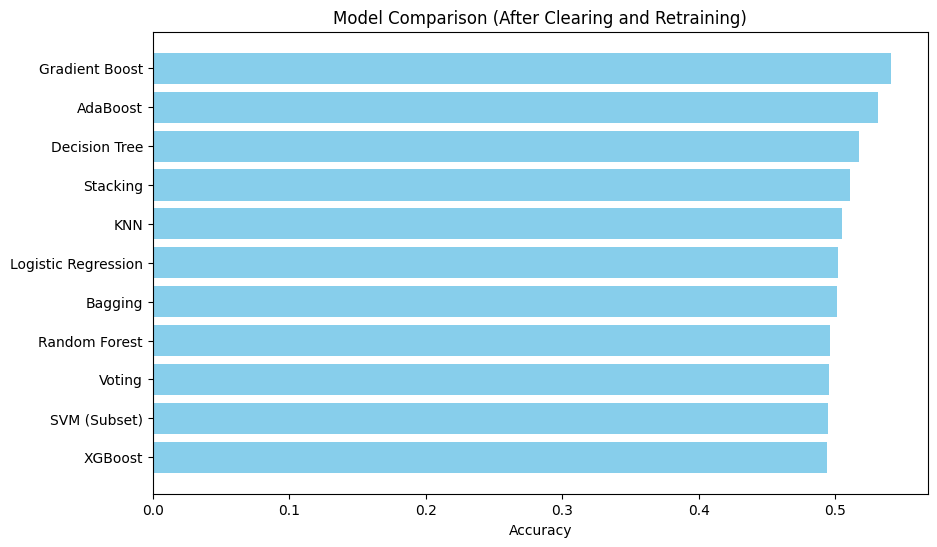

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison (After Clearing and Retraining)")
plt.gca().invert_yaxis()
plt.show()
